In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import stretched_echelle_widget as sew
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib notebook

# import stuff to plot

In [7]:
import pandas as pd 
highmass_rc = pd.read_csv('../datatables/highmass_rc_werr.csv')
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
adopted_masses = pd.read_csv('../datatables/adopted_masses.csv')
pysyd_results = pd.read_csv('../datatables/pysyd_results.csv')

In [8]:
def read_star_sample(star_name,suppress_output=True,unpack=False):
#     delta_nu,nu_max,mass,lc,ps
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    mass = adopted_masses['corr_mass'][adopted_masses['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
#         print('Using new values')
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
        print('Adopted mass =',mass)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,mass,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,mass,lightcurve,powerspec

In [9]:
def read_star_bsps(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/pysyd_bsps/'+star_name[4:]+'_BSPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [10]:
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,feh_e_adopt,adopt_flag,adopt_flag_int,suppressed_flag,dPi,epsilon,l0_mean_amp,l1_vis,l2_vis,l3_vis
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,0.007000,apogee,1,0.0,NaN,0.89,2964.85,0.80,0.82,0.08
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,0.086673,avg,0,1.0,NaN,0.87,960.27,0.76,0.42,0.09
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,0.008000,apogee,1,2.0,NaN,0.86,1585.03,0.69,0.53,0.07
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,0.093675,avg,0,1.0,NaN,0.87,957.07,0.92,0.61,0.22
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,0.008000,apogee,1,2.0,NaN,0.93,769.93,0.64,0.54,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,0.067201,avg,0,2.0,NaN,0.96,864.59,0.71,0.62,0.15
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,0.007000,apogee,1,0.0,309.0,1.00,4080.10,1.39,0.70,0.16
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,0.025000,lamost,2,2.0,NaN,0.94,5992.76,0.67,0.65,0.09
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,0.044000,lamost,2,0.0,204.5,1.11,1837.23,1.19,0.59,0.14


# running the widget

In [14]:
# i = 0
# kic_number = highmass_rc_newvals['KIC'][i]
# kic_number
kic_number = 3120567 #7988900 #6599955 #3120567 #9612933

In [15]:
delta_nu,nu_max,mass,lightcurve,powerspec = read_star_sample('KIC '+str(kic_number),suppress_output=False)
# delta_nu,nu_max,mass,time,flux,freq,power,amp = read_star('KIC 3758458',unpack=True,suppress_output=False)

freq = powerspec['freq']
power = powerspec['power']

smooth_percent = 0.02
freq_res = np.median(np.diff(freq))
smoothed_power = convolve(power, Box1DKernel((delta_nu*smooth_percent)/freq_res))

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
Adopted mass = 3.18687785102271
returning dataframes


<IPython.core.display.Javascript object>


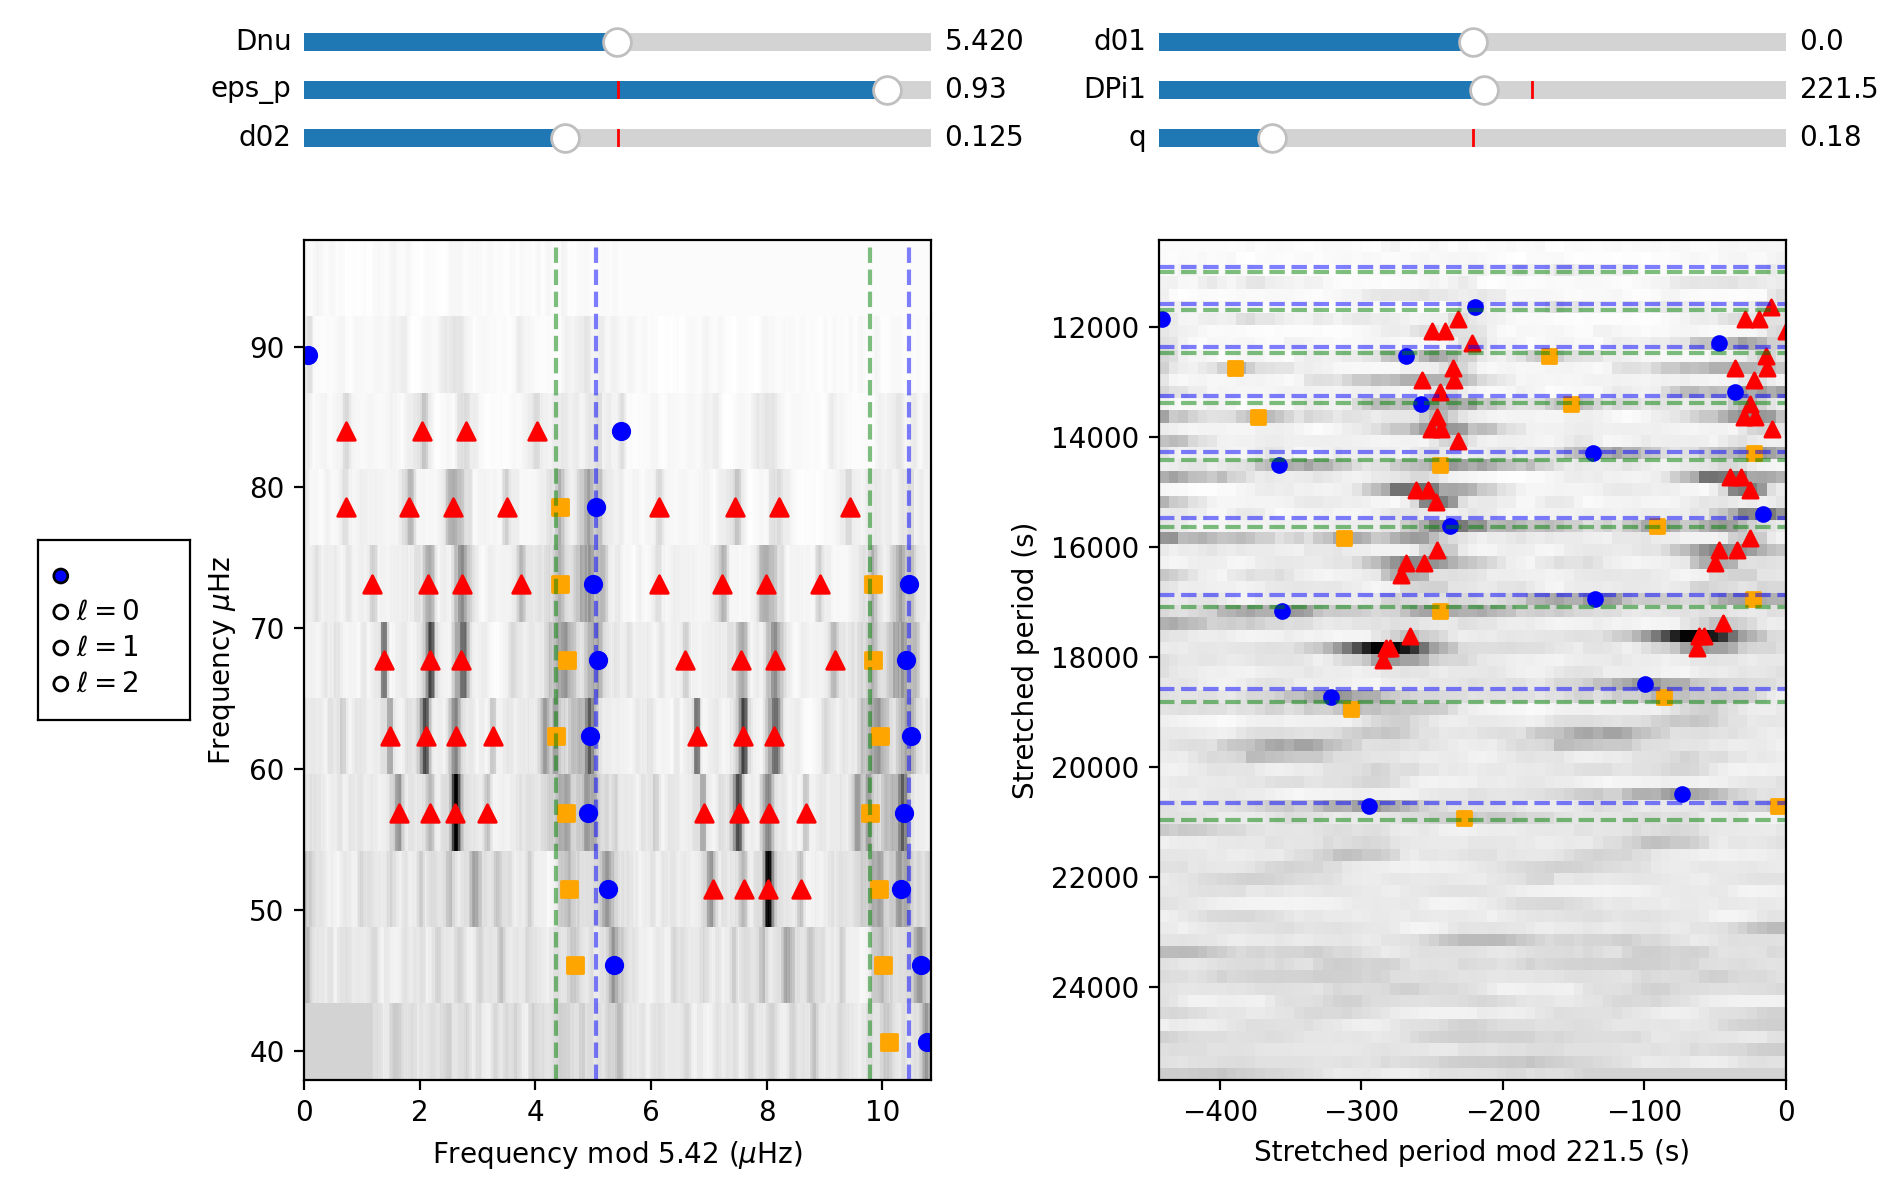

In [16]:
# resample spectrum to have 5000 pixels
# nu = np.linspace(nu_max-5*delta_nu, nu_max+5*delta_nu, 5000)
nu = np.linspace(0.5*nu_max, 1.5*nu_max, 5000)
ps = np.interp(nu, freq, smoothed_power)

# initiate a star object
star = sew.Star(nu, ps, nu_max, delta_nu,fmin=0.6*nu_max, fmax=1.5*nu_max)

# interactive echelles
star.plot_freq_echelle(snapping=True)#,plot_l1_line=True)
# plt.show()

In [17]:
star.f_labels

{0: [48.71265406406681,
  54.031739533928786,
  59.103122494164836,
  64.56561468012603,
  70.11936568542308,
  75.4514881294759,
  80.92701728962793],
 1: [55.84387894645529,
  56.37839488827966,
  56.80861503657732,
  57.369204926783354,
  61.110816519553914,
  61.72355430652331,
  62.24503327415683,
  62.88384500950791,
  66.41686501522506,
  67.21212044086617,
  67.74663638269054,
  71.63165469156031,
  72.59639078168235,
  73.18305462027006,
  74.21297558134627,
  76.59874185826965,
  77.69384769030006,
  78.44999219336867,
  79.38865433510902,
  82.02212312165832,
  83.33885751493298,
  84.0950020180016,
  85.32047759194039],
 2: [48.04776838033407,
  53.36685385019604,
  58.72505024263053,
  63.97895084153831,
  69.58484974359872,
  74.87786126507902,
  80.3012425284677]}

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
returning dataframes


<IPython.core.display.Javascript object>


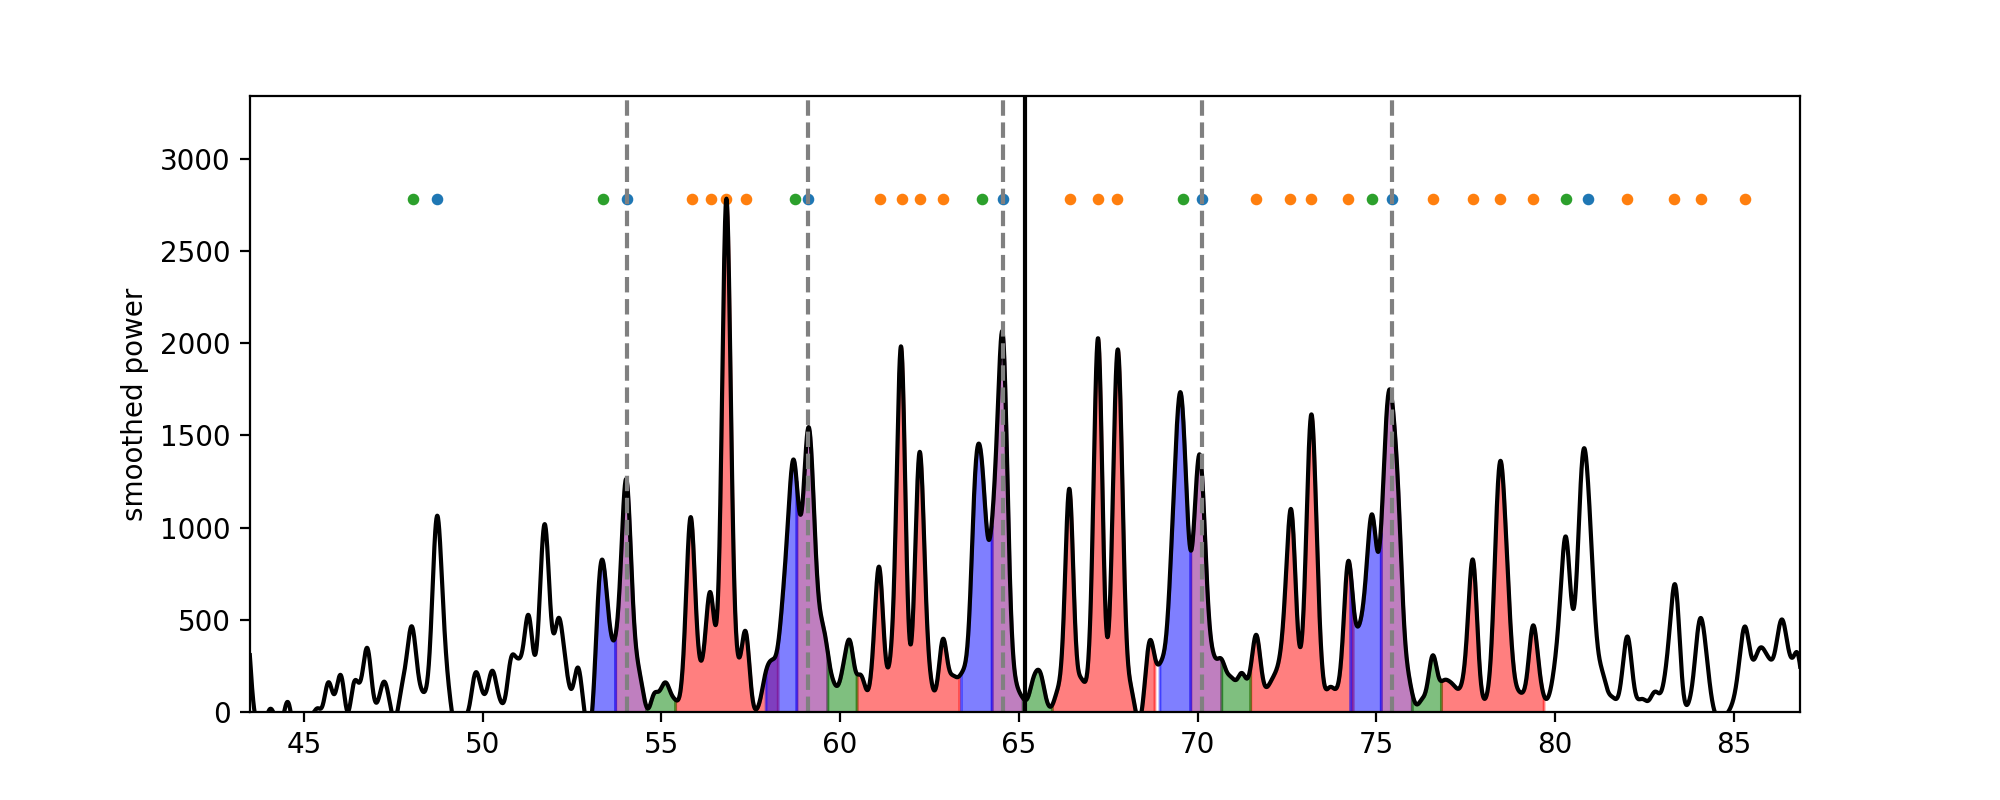

mode amplitudes
521.6467730538498 1575.1480638842538 299.5519739966826 70.04011436279852
873.2176606504876 1492.3721672880897 573.6957522836012 165.85072701979865
887.8549687351091 1709.1520726992007 675.6149325275752 91.6093895003084
659.997467239308 1392.60881353439 826.4142018423818 142.59732733945805
912.295679961566 1061.4244205343082 543.9182283799985 101.25834035596874
mean mode amplitudes
1330.575658199855 2511.6104711107037 1011.5565585386589 196.89282615408743
Visibilites for KIC 3120567
radial amplitude: 1330.58
dipole visiblity: 1.89
quadrupole visiblity: 0.76
octupole visiblity: 0.15
wrote to output dataframe


In [18]:
delta_nu,nu_max,lightcurve,powerspec = read_star_bsps('KIC '+str(kic_number),suppress_output=False)
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))

# accounting for asymmetries Stello 2016 (PASA)
l0_halfwidth = 0.08
l2_halfwidth = 0.08
l1_halfwidth = 0.265
l3_halfwidth = 0.075
d02_spacing = 0.14
d01_spacing = 0.515
d03_spacing = 0.175

plt.figure(figsize=(10,4))
plt.plot(powerspec['freq'],smooth_power,color='k')

# plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),3500),s=10)
# plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),3500),s=10)
# plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),3500),s=10)

###################

def define_regions(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-(radial_mode+0.02*delta_nu))<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu
    

    plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][radial_region],smooth_power[radial_region], 0, color='purple',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][quadru_region],smooth_power[quadru_region], 0, color='blue',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][dipole_region],smooth_power[dipole_region], 0, color='red',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][octupo_region],smooth_power[octupo_region], 0, color='green',alpha=0.5)
    
for i in [-2,-1,0,1,2]:
    define_regions(i)

###################

plt.axvline(nu_max,color='k')
plt.xlim(nu_max-4*delta_nu,nu_max+4*delta_nu)
subset = smooth_power[(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),peak),s=10)
plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),peak),s=10)
plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),peak),s=10)
# plt.ylim(top=5000)
plt.ylabel('smoothed power')
plt.show()

print('mode amplitudes')
def find_mode_amps(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-radial_mode)<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu

    # using unsmoothed power here, that seems more right
    # I don't think I need to have the frequency resolution here??
    # need the power density!
    eff_obs_time = len(lightcurve) * 1800e-6  ##### this might be wrong considering bsps is probably in power density?
    l0_amp = (sp.integrate.trapezoid(x=powerspec['freq'][radial_region],
                                     y=powerspec['power'][radial_region]*eff_obs_time))*freq_res
    l1_amp = (sp.integrate.trapezoid(x=powerspec['freq'][dipole_region],
                                     y=powerspec['power'][dipole_region]*eff_obs_time))*freq_res
    l2_amp = (sp.integrate.trapezoid(x=powerspec['freq'][quadru_region],
                                     y=powerspec['power'][quadru_region]*eff_obs_time))*freq_res
    l3_amp = (sp.integrate.trapezoid(x=powerspec['freq'][octupo_region],
                                     y=powerspec['power'][octupo_region]*eff_obs_time))*freq_res
    print(l0_amp,l1_amp,l2_amp,l3_amp)
    return l0_amp,l1_amp,l2_amp,l3_amp

l0_amp_arr = []
l1_amp_arr = []
l2_amp_arr = []
l3_amp_arr = []
for i in [-2,-1,0,1,2]:
    l0,l1,l2,l3 = find_mode_amps(i)
    l0_amp_arr.append(l0)
    l1_amp_arr.append(l1)
    l2_amp_arr.append(l2)
    l3_amp_arr.append(l3)
    
FWHM = pysyd_results['FWHM'][pysyd_results['KIC']==kic_number].values[0]
# FWHM = 1
# print(FWHM)
sigma_var = FWHM/(2*np.sqrt(2*np.log(2)))

def mean_calculation(index=0):
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    l0_denom = np.exp(-(radial_mode-nu_max)**2/(2*sigma_var**2))
    quadru_mode = radial_mode - d02_spacing*delta_nu
    l2_denom = np.exp(-(quadru_mode-nu_max)**2/(2*sigma_var**2))
    dipole_mode = radial_mode + d01_spacing*delta_nu
    l1_denom = np.exp(-(dipole_mode-nu_max)**2/(2*sigma_var**2))
    octupo_mode = radial_mode + d03_spacing*delta_nu
    l3_denom = np.exp(-(octupo_mode-nu_max)**2/(2*sigma_var**2))
    return l0_denom,l1_denom,l2_denom,l3_denom

l0_denom_arr = []
l1_denom_arr = []
l2_denom_arr = []
l3_denom_arr = []
for i in [-2,-1,0,1,2]:
    l0_denom,l1_denom,l2_denom,l3_denom = mean_calculation(i)
    l0_denom_arr.append(l0_denom)
    l1_denom_arr.append(l1_denom)
    l2_denom_arr.append(l2_denom)
    l3_denom_arr.append(l3_denom)
# l0_denom_arr

print('mean mode amplitudes')
mean_l0_amp = np.sum(l0_amp_arr)/np.sum(l0_denom_arr)
mean_l1_amp = np.sum(l1_amp_arr)/np.sum(l1_denom_arr)
mean_l2_amp = np.sum(l2_amp_arr)/np.sum(l2_denom_arr)
mean_l3_amp = np.sum(l3_amp_arr)/np.sum(l3_denom_arr)
print(mean_l0_amp,mean_l1_amp,mean_l2_amp,mean_l3_amp)

l1_visibility = mean_l1_amp/mean_l0_amp
l2_visibility = mean_l2_amp/mean_l0_amp
l3_visibility = mean_l3_amp/mean_l0_amp
print('Visibilites for KIC',kic_number)
print('radial amplitude:',np.round(mean_l0_amp,2))
print('dipole visiblity:',np.round(l1_visibility,2))
print('quadrupole visiblity:',np.round(l2_visibility,2))
print('octupole visiblity:',np.round(l3_visibility,2))

print('wrote to output dataframe')
star_ind = highmass_rc_newvals[highmass_rc_newvals['KIC']==kic_number].index[0]
# type(star_ind)
highmass_rc_newvals['l0_mean_amp'][star_ind] = np.round(mean_l0_amp,2)
highmass_rc_newvals['l1_vis'][star_ind] = np.round(l1_visibility,2)
highmass_rc_newvals['l2_vis'][star_ind] = np.round(l2_visibility,2)
highmass_rc_newvals['l3_vis'][star_ind] = np.round(l3_visibility,2)
highmass_rc_newvals.to_csv('../datatables/highmass_rc_newvals.csv',index=False)

# visibility test

In [21]:
def read_star_vistest(star_name,nu_max,delta_nu,suppress_output=True,unpack=False):
#     delta_nu,nu_max,mass,lc,ps
#     delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
#     nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
#     mass = adopted_masses['corr_mass'][adopted_masses['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
#         print('Using new values')
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
#         print('Adopted mass =',mass)
    
    lightcurve = pd.read_csv('../data/visibility_tests/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/visibility_tests/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [22]:
def read_star_bsps_vistest(star_name,nu_max,delta_nu,suppress_output=True,unpack=False):
#     delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
#     nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/visibility_tests/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/visibility_tests/'+star_name[4:]+'/'+star_name[4:]+'_BSPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [66]:
# 2141255   147.82   12.371
# 4348666   182.87   13.927
# 2305987   52.571   5.489
# 1296068   58.740   6.127
kic_number = 2305987
delta_nu,nu_max,lightcurve,powerspec = read_star_vistest('KIC '+str(kic_number),52.571,5.489,suppress_output=False)

freq = powerspec['freq']
power = powerspec['power']

smooth_percent = 0.02
freq_res = np.median(np.diff(freq))
smoothed_power = convolve(power, Box1DKernel((delta_nu*smooth_percent)/freq_res))

KIC 2305987
delta_nu = 5.489
nu_max = 52.571
returning dataframes


<IPython.core.display.Javascript object>


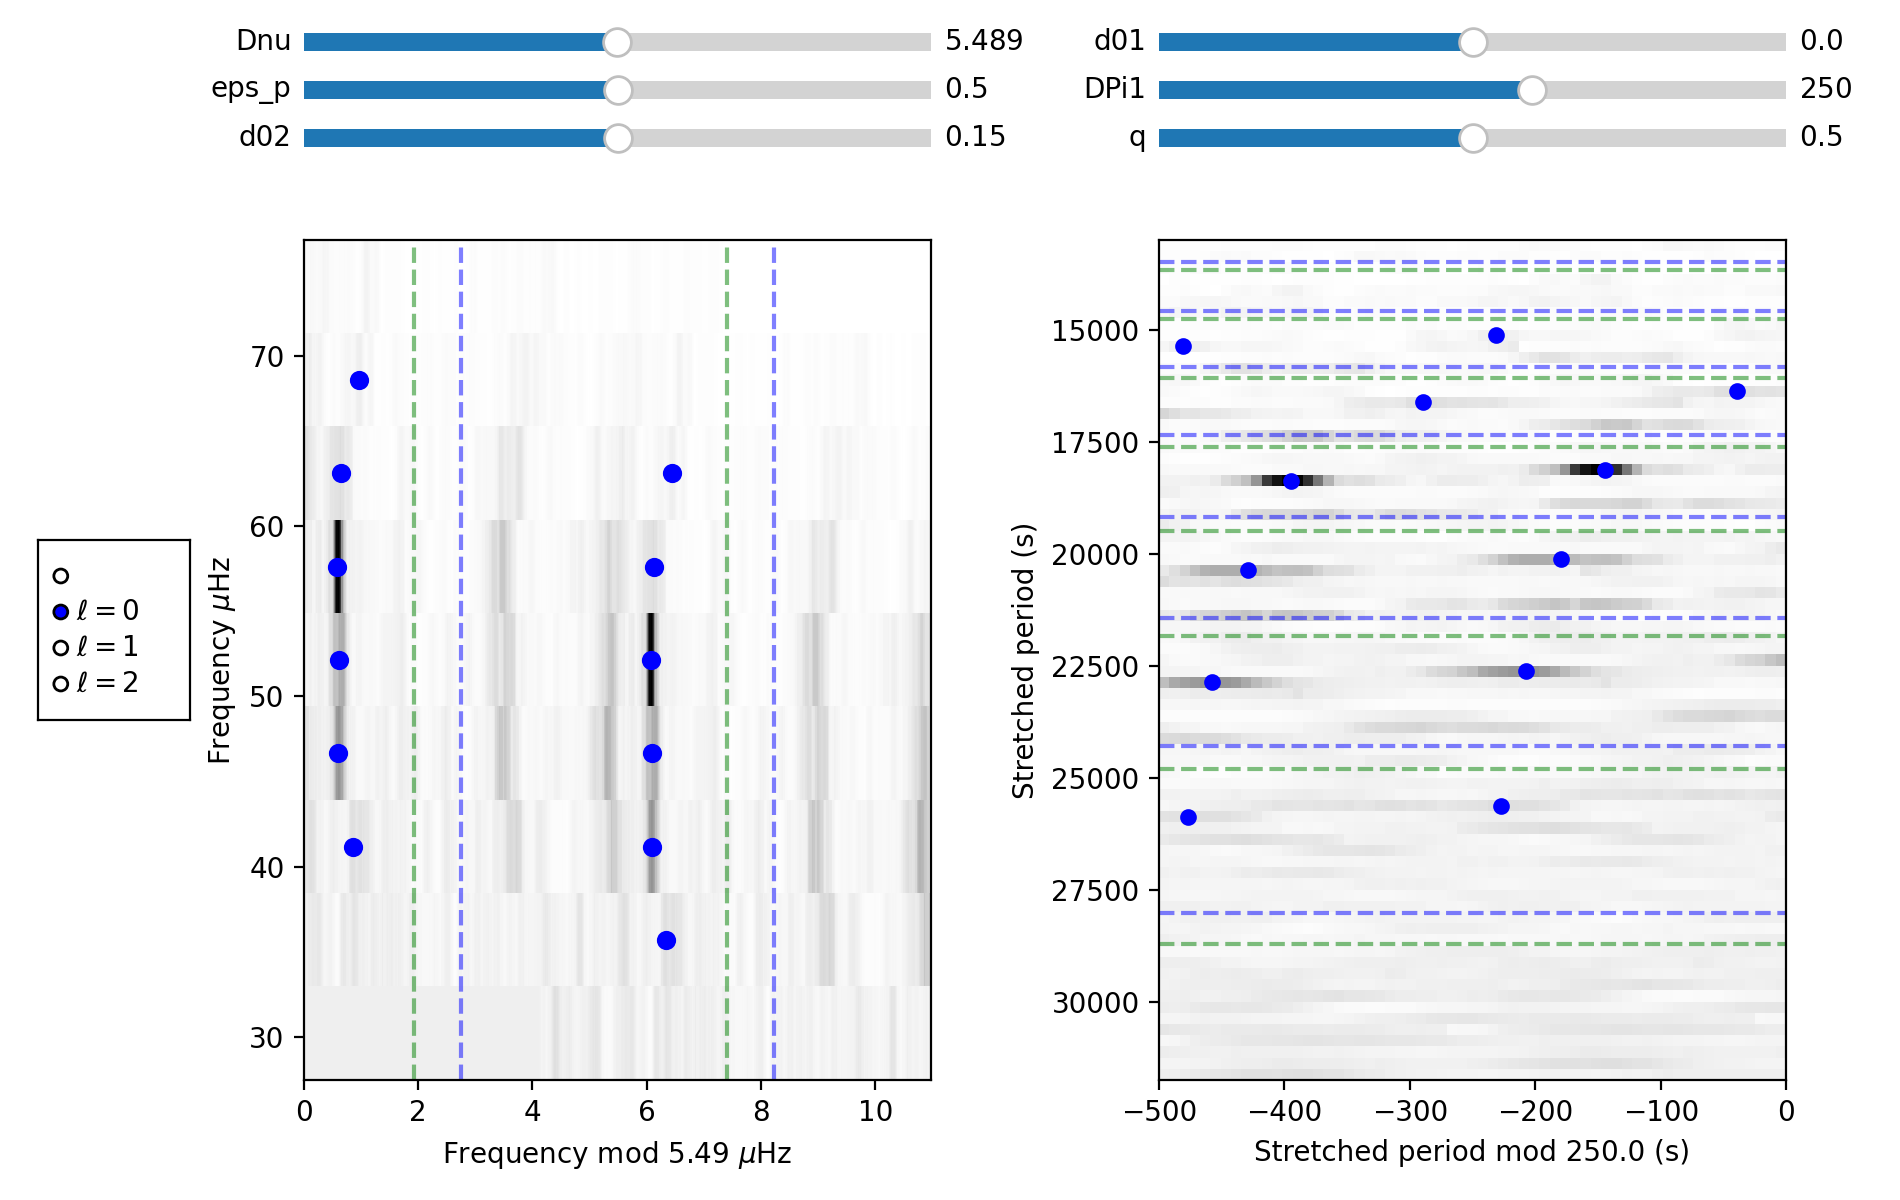

In [67]:
# resample spectrum to have 5000 pixels
# nu = np.linspace(nu_max-5*delta_nu, nu_max+5*delta_nu, 5000)
nu = np.linspace(0.5*nu_max, 1.5*nu_max, 5000)
ps = np.interp(nu, freq, smoothed_power)

# initiate a star object
star = sew.Star(nu, ps, nu_max, delta_nu,fmin=0.6*nu_max, fmax=1.5*nu_max)

# interactive echelles
star.plot_freq_echelle(snapping=True)#,plot_l1_line=True)
# plt.show()

In [68]:
yu_catalog = pd.read_csv('../datatables/yu2018_catalog_werr.csv')

FWHM = yu_catalog['Width'][yu_catalog['KIC']==kic_number].values[0]
FWHM

22.7

KIC 2305987
delta_nu = 5.489
nu_max = 52.571
returning dataframes


<IPython.core.display.Javascript object>


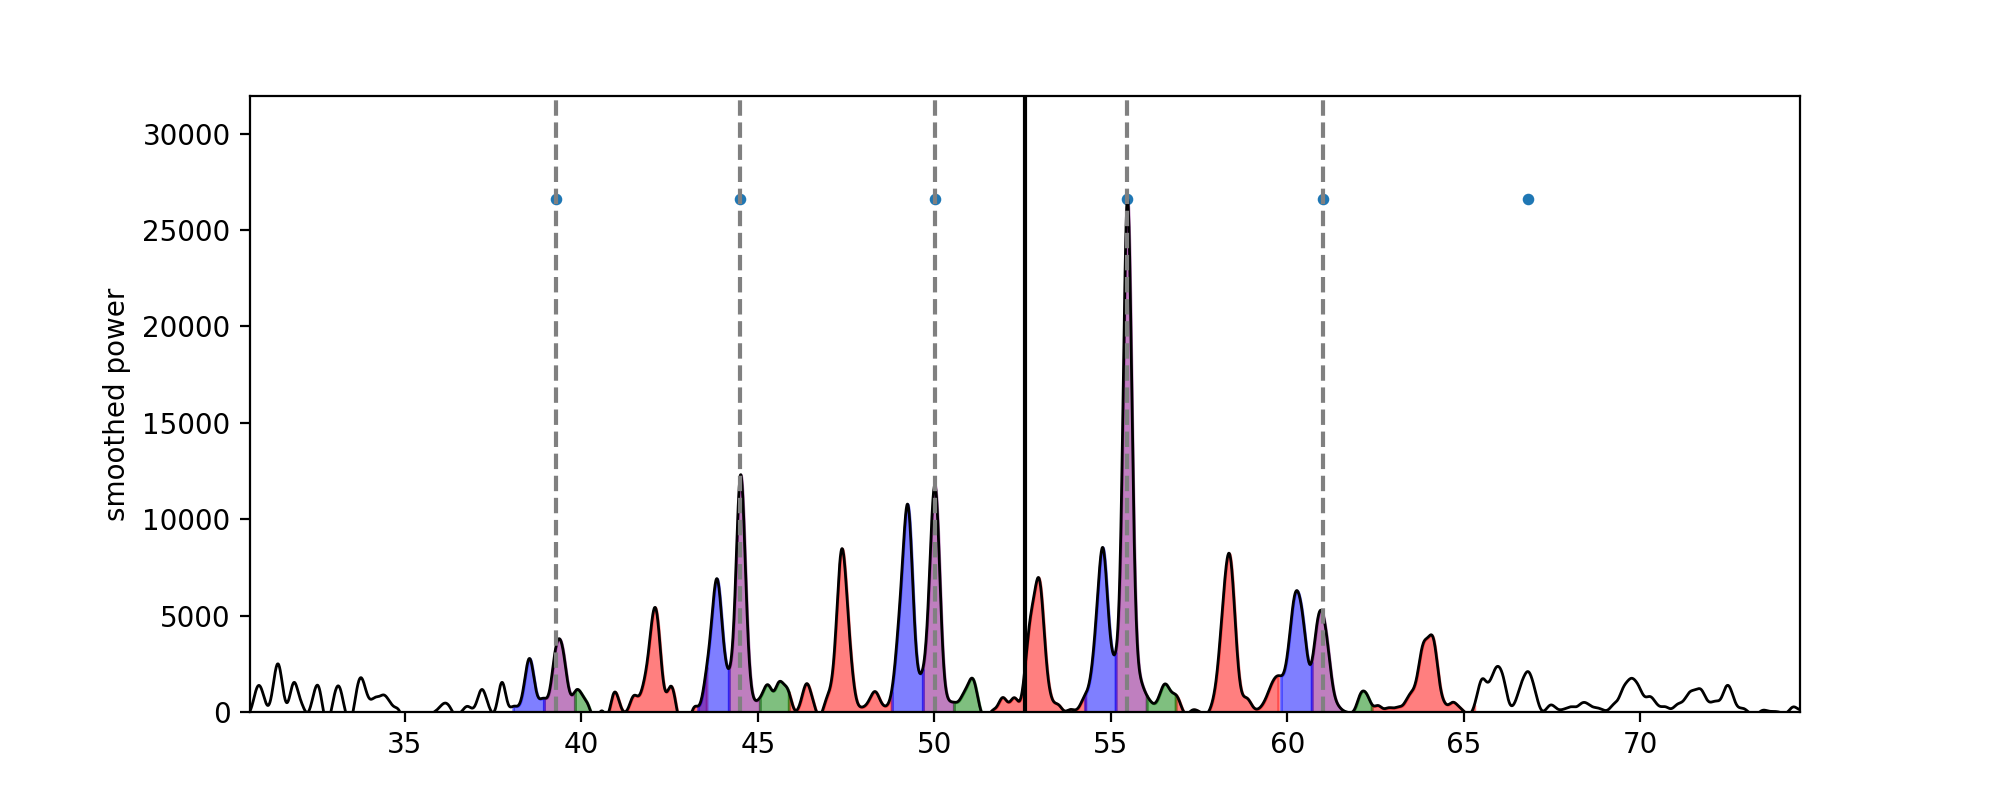

mode amplitudes
17.10585046696233 27.362291849162343 9.552770834974286 4.244374429489414
42.17684273110957 42.36357641449477 29.021208120865506 10.0297036473564
43.33073148243375 39.46102729864875 45.59761129576929 7.344067028704655
86.04444397036599 43.60849098302627 36.53147932260808 6.816541250095715
24.69493650974642 27.678918528424866 32.24191527013013 3.602335535021255
mean mode amplitudes
57.7672659834166 48.00129503463898 41.922600590100515 8.580668631853984
Visibilites for KIC 2305987
radial amplitude: 57.77
dipole visiblity: 0.83
quadrupole visiblity: 0.73
octupole visiblity: 0.15


In [74]:
delta_nu,nu_max,lightcurve,powerspec = read_star_bsps_vistest('KIC '+str(kic_number),
                                                              nu_max,delta_nu,suppress_output=False)
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))

# accounting for asymmetries Stello 2016 (PASA)
l0_halfwidth = 0.08
l2_halfwidth = 0.08
l1_halfwidth = 0.265
l3_halfwidth = 0.075
d02_spacing = 0.14
d01_spacing = 0.515
d03_spacing = 0.175

plt.figure(figsize=(10,4))
plt.plot(powerspec['freq'],smooth_power,color='k',linewidth=1)

# plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),3500),s=10)
# plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),3500),s=10)
# plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),3500),s=10)

###################

def define_regions(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(np.asarray(star.f_labels[0])-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-(radial_mode+0.02*delta_nu))<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu
    

    plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][radial_region],smooth_power[radial_region], 0, color='purple',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][quadru_region],smooth_power[quadru_region], 0, color='blue',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][dipole_region],smooth_power[dipole_region], 0, color='red',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][octupo_region],smooth_power[octupo_region], 0, color='green',alpha=0.5)
    
for i in [-2,-1,0,1,2]:
    define_regions(i)

###################

plt.axvline(nu_max,color='k')
plt.xlim(nu_max-4*delta_nu,nu_max+4*delta_nu)
subset = smooth_power[(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),peak),s=10)
plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),peak),s=10)
plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),peak),s=10)
# plt.ylim(top=5000)
plt.ylabel('smoothed power')
plt.show()

print('mode amplitudes')
def find_mode_amps(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(np.asarray(star.f_labels[0])-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-radial_mode)<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu

    # using unsmoothed power here, that seems more right
    # I don't think I need to have the frequency resolution here??
    # need the power density!
#     eff_obs_time = len(lightcurve) * 1800e-6  ##### this might be wrong considering bsps is probably in power density?
    eff_obs_time = 1
    l0_amp = (sp.integrate.trapezoid(x=powerspec['freq'][radial_region],
                                     y=powerspec['power'][radial_region]*eff_obs_time))*freq_res
    l1_amp = (sp.integrate.trapezoid(x=powerspec['freq'][dipole_region],
                                     y=powerspec['power'][dipole_region]*eff_obs_time))*freq_res
    l2_amp = (sp.integrate.trapezoid(x=powerspec['freq'][quadru_region],
                                     y=powerspec['power'][quadru_region]*eff_obs_time))*freq_res
    l3_amp = (sp.integrate.trapezoid(x=powerspec['freq'][octupo_region],
                                     y=powerspec['power'][octupo_region]*eff_obs_time))*freq_res
    print(l0_amp,l1_amp,l2_amp,l3_amp)
    return l0_amp,l1_amp,l2_amp,l3_amp

l0_amp_arr = []
l1_amp_arr = []
l2_amp_arr = []
l3_amp_arr = []
for i in [-2,-1,0,1,2]:
    l0,l1,l2,l3 = find_mode_amps(i)
    l0_amp_arr.append(l0)
    l1_amp_arr.append(l1)
    l2_amp_arr.append(l2)
    l3_amp_arr.append(l3)
    
# FWHM = pysyd_results['FWHM'][pysyd_results['KIC']==kic_number].values[0]
# FWHM = 1
# print(FWHM)
sigma_var = FWHM/(2*np.sqrt(2*np.log(2)))

def mean_calculation(index=0):
    radial_mode_ind = np.argmin(np.abs(np.asarray(star.f_labels[0])-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    l0_denom = np.exp(-(radial_mode-nu_max)**2/(2*sigma_var**2))
    quadru_mode = radial_mode - d02_spacing*delta_nu
    l2_denom = np.exp(-(quadru_mode-nu_max)**2/(2*sigma_var**2))
    dipole_mode = radial_mode + d01_spacing*delta_nu
    l1_denom = np.exp(-(dipole_mode-nu_max)**2/(2*sigma_var**2))
    octupo_mode = radial_mode + d03_spacing*delta_nu
    l3_denom = np.exp(-(octupo_mode-nu_max)**2/(2*sigma_var**2))
    return l0_denom,l1_denom,l2_denom,l3_denom

l0_denom_arr = []
l1_denom_arr = []
l2_denom_arr = []
l3_denom_arr = []
for i in [-2,-1,0,1,2]:
    l0_denom,l1_denom,l2_denom,l3_denom = mean_calculation(i)
    l0_denom_arr.append(l0_denom)
    l1_denom_arr.append(l1_denom)
    l2_denom_arr.append(l2_denom)
    l3_denom_arr.append(l3_denom)
# l0_denom_arr

print('mean mode amplitudes')
mean_l0_amp = np.sum(l0_amp_arr)/np.sum(l0_denom_arr)
mean_l1_amp = np.sum(l1_amp_arr)/np.sum(l1_denom_arr)
mean_l2_amp = np.sum(l2_amp_arr)/np.sum(l2_denom_arr)
mean_l3_amp = np.sum(l3_amp_arr)/np.sum(l3_denom_arr)
print(mean_l0_amp,mean_l1_amp,mean_l2_amp,mean_l3_amp)

l1_visibility = mean_l1_amp/mean_l0_amp
l2_visibility = mean_l2_amp/mean_l0_amp
l3_visibility = mean_l3_amp/mean_l0_amp
print('Visibilites for KIC',kic_number)
print('radial amplitude:',np.round(mean_l0_amp,2))
print('dipole visiblity:',np.round(l1_visibility,2))
print('quadrupole visiblity:',np.round(l2_visibility,2))
print('octupole visiblity:',np.round(l3_visibility,2))

# print('wrote to output dataframe')
# star_ind = highmass_rc_newvals[highmass_rc_newvals['KIC']==kic_number].index[0]
# # type(star_ind)
# highmass_rc_newvals['l0_mean_amp'][star_ind] = np.round(mean_l0_amp,2)
# highmass_rc_newvals['l1_vis'][star_ind] = np.round(l1_visibility,2)
# highmass_rc_newvals['l2_vis'][star_ind] = np.round(l2_visibility,2)
# highmass_rc_newvals['l3_vis'][star_ind] = np.round(l3_visibility,2)
# highmass_rc_newvals.to_csv('../datatables/highmass_rc_newvals.csv',index=False)

In [91]:
# star.f_labels

# Extra stuff with the output

In [10]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize,basinhopping

In [11]:
def lorentzian(x, amplitude, center, width):
    return (amplitude*width**2/((x-center)**2+width**2))

def peakbag(l,freq_list,freq,power,dnu):
    #want to fit a lorentzian to the region around the clicked peak
    for f in freq_list:
        # probably want to mask around the peak itself
        power_region = power[(f-(dnu*0.07) < freq) & (freq < f+(dnu*0.07))]
        freq_region = freq[(f-(dnu*0.07) < freq) & (freq < f+(dnu*0.07))]
        
        popt, pcov = curve_fit(lorentzian, freq_region, power_region,
                               p0=[max(power_region), f, 0.1])#,
#                               bounds=([0, 0, 0.05], np.inf))
        perr = np.sqrt(np.diag(pcov))
    
        def minus_log_likelihood(theta, freq, power):
            amp, cen, wid, bg = theta
            model = lorentzian(freq,amp,cen,wid) + bg
            return np.sum(np.log(model) + power/model)
        bnds = ((0, None), None, None, None)
#         res = minimize(minus_log_likelihood, [max(power_region), f, 0.1, 1], 
#                        args=(freq_region,power_region), bounds=bnds)
        kwargs = dict({'args':(freq_region,power_region),'method':'BFGS','bounds':bnds})
        res = basinhopping(minus_log_likelihood, [max(power_region), f, 0.1, 1], 
                       minimizer_kwargs=kwargs) # note that BFGS doesn't take bounds so this will have to change
        err = np.sqrt(np.diag(res.lowest_optimization_result.hess_inv))
    
        print('------- CURVE FIT VALUES --------')
        print('Amplitude:',np.round(popt[0],2),'+/-',np.round(perr[0],2))
        print('Center:',np.round(popt[1],2),'+/-',np.round(perr[1],2))
        print('Width:',np.round(popt[2],4),'+/-',np.round(perr[2],4))
        
        print('------- MINIMIZE VALUES ---------')
        print('Amplitude:',np.round(res.x[0],2),'+/-',np.round(err[0],2))
        print('Center:',np.round(res.x[1],2),'+/-',np.round(err[1],2))
        print('Width:',np.round(res.x[2],4),'+/-',np.round(err[2],4))
        print('BG:',np.round(res.x[3],1),'+/-',np.round(err[3],2))
        
#         print(res.lowest_optimization_result.hess_inv)
        
        fig = plt.figure(figsize=(4,2))
        plt.plot(freq_region,power_region,label='data')
        plt.plot(freq_region,lorentzian(freq_region,*popt),
                 linestyle='--',label='curve fit')
        plt.plot(freq_region,lorentzian(freq_region,*res.x[:-1]),
                 linestyle='--',label='minimize fit')
        plt.legend()
        plt.xlabel(r'Frequency ($\mu$Hz)')
        plt.ylabel('Power')
        plt.show()
        
def estimate_dpi(freq_list,numax,dnu):
    # a very back of the envelope estimate
#     freq_list = np.sort(freq_list)
    df = np.diff(freq_list)
    # only take the frequencies next to each other
    df = df[df < dnu*0.5]
    dpi = df/(numax**2) * 1e6
    print('All Dpis:',dpi)
    print('Average Dpi:',np.average(dpi))
    print('Average Dpi:',np.average(dpi))

In [12]:
estimate_dpi(star.f_labels[1],star.numax,star.Dnu)

All Dpis: []
Average Dpi: nan
Average Dpi: nan


In [13]:
# peakbag(1,star.f_labels[1],freq,power,star.Dnu)

# Mode Visibilities

$$A_{0}^{2}(n) = \delta \nu \int_{n-e_{20}}^{n+e_{03}}[p(n')-B]dn'$$
where p = power density, B = local background, $\delta \nu$ the frequency resolution   
where also $e_{12}$ = -0.22, $e_{20}$ = -0.065, $e_{03}$ = 0.17, $e_{31}$ = 0.27   
then   
$$\langle A_{\ell}^{2} \rangle = \sum_{n_{max}-2}^{n_{max}+2} A_{\ell}^{2}(n)/ \sum_{n_{max}-2}^{n_{max}+2} exp[\frac{-(\nu_{n,\ell}-\nu_{max})^2}{2\sigma^2}]$$
and the visibility is   
$$V_{\ell}^{2} = \langle A_{\ell}^{2} \rangle/\langle A_{0}^{2} \rangle$$

and you expect roughly $V_{1}^{2}$ = 1.54, $V_{2}^{2}$ = 0.58, $V_{3}^{2}$ = 0.043

also
$$n' = \nu/\Delta\nu - \epsilon(\Delta\nu)$$

KIC 3347458
delta_nu = 3.362860546
nu_max = 40.29162051
returning dataframes


<IPython.core.display.Javascript object>


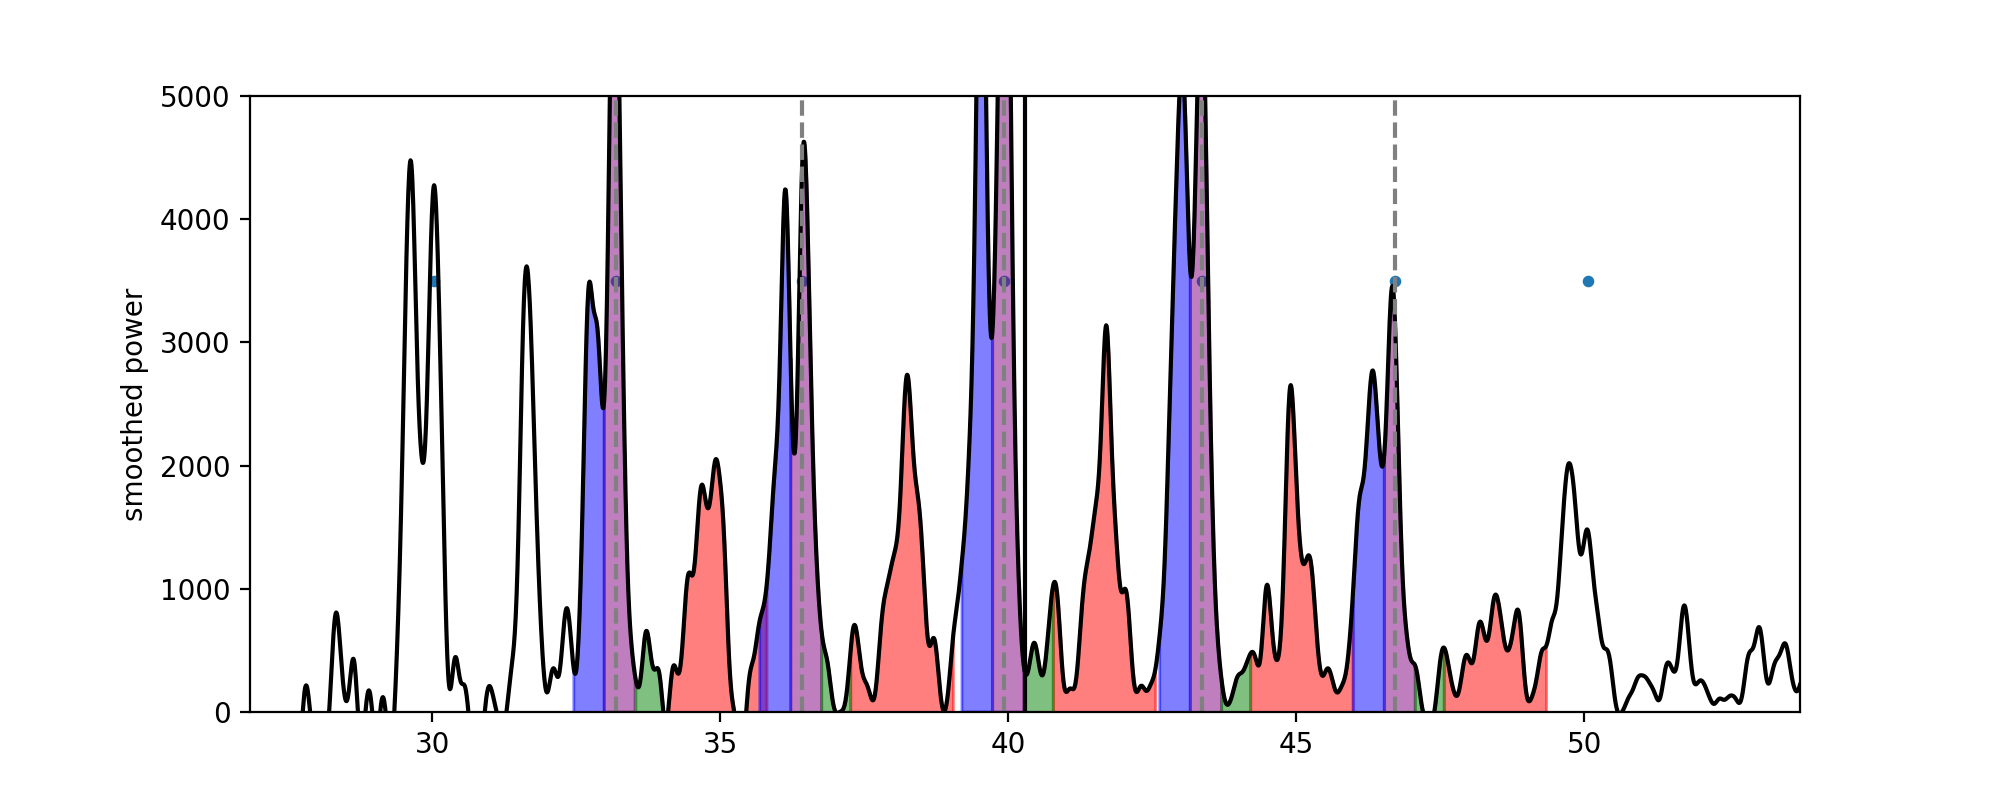

mode amplitudes
1705.9731045862982 1231.6438584340344 1015.9096419350223 152.5381375652331
1335.3948758032734 1415.2570296253368 1053.939772700013 54.83433249478329
2098.8168716407968 1471.3922690603465 1792.1683008949424 214.94479613348582
1703.0658200161683 1287.7146406595687 1553.0118487948387 89.17283618367661
909.8965675175516 751.4149689755209 957.0801363634814 71.08844389808255
mean mode amplitudes
2964.846123199005 2367.0439215962874 2442.3200584479227 222.63755356638694
Visibilites for KIC 3347458
dipole visiblity: 0.8
quadrupole visiblity: 0.82
octupole visiblity: 0.08
wrote to output dataframe


In [76]:
delta_nu,nu_max,lightcurve,powerspec = read_star_bsps('KIC '+str(kic_number),suppress_output=False)
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))

# accounting for asymmetries Stello 2016 (PASA)
l0_halfwidth = 0.08
l2_halfwidth = 0.08
l1_halfwidth = 0.265
l3_halfwidth = 0.075
d02_spacing = 0.14
d01_spacing = 0.515
d03_spacing = 0.175

plt.figure(figsize=(10,4))
plt.plot(powerspec['freq'],smooth_power,color='k')

plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),3500),s=10)
plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),3500),s=10)
plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),3500),s=10)

###################

def define_regions(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-(radial_mode+0.02*delta_nu))<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu
    

    plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][radial_region],smooth_power[radial_region], 0, color='purple',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][quadru_region],smooth_power[quadru_region], 0, color='blue',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][dipole_region],smooth_power[dipole_region], 0, color='red',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][octupo_region],smooth_power[octupo_region], 0, color='green',alpha=0.5)
    
for i in [-2,-1,0,1,2]:
    define_regions(i)

###################

plt.axvline(nu_max,color='k')
plt.xlim(nu_max-4*delta_nu,nu_max+4*delta_nu)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.1)
plt.ylim(top=5000)
plt.ylabel('smoothed power')
plt.show()

print('mode amplitudes')
def find_mode_amps(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-radial_mode)<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu

    # using unsmoothed power here, that seems more right
    # I don't think I need to have the frequency resolution here??
    # need the power density!
    eff_obs_time = len(lightcurve) * 1800e-6
    l0_amp = (sp.integrate.trapezoid(x=powerspec['freq'][radial_region],
                                     y=powerspec['power'][radial_region]*eff_obs_time))*freq_res
    l1_amp = (sp.integrate.trapezoid(x=powerspec['freq'][dipole_region],
                                     y=powerspec['power'][dipole_region]*eff_obs_time))*freq_res
    l2_amp = (sp.integrate.trapezoid(x=powerspec['freq'][quadru_region],
                                     y=powerspec['power'][quadru_region]*eff_obs_time))*freq_res
    l3_amp = (sp.integrate.trapezoid(x=powerspec['freq'][octupo_region],
                                     y=powerspec['power'][octupo_region]*eff_obs_time))*freq_res
    print(l0_amp,l1_amp,l2_amp,l3_amp)
    return l0_amp,l1_amp,l2_amp,l3_amp

l0_amp_arr = []
l1_amp_arr = []
l2_amp_arr = []
l3_amp_arr = []
for i in [-2,-1,0,1,2]:
    l0,l1,l2,l3 = find_mode_amps(i)
    l0_amp_arr.append(l0)
    l1_amp_arr.append(l1)
    l2_amp_arr.append(l2)
    l3_amp_arr.append(l3)
    
FWHM = pysyd_results['FWHM'][pysyd_results['KIC']==kic_number].values[0]
# FWHM = 1
# print(FWHM)
sigma_var = FWHM/(2*np.sqrt(2*np.log(2)))

def mean_calculation(index=0):
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    l0_denom = np.exp(-(radial_mode-nu_max)**2/(2*sigma_var**2))
    quadru_mode = radial_mode - d02_spacing*delta_nu
    l2_denom = np.exp(-(quadru_mode-nu_max)**2/(2*sigma_var**2))
    dipole_mode = radial_mode + d01_spacing*delta_nu
    l1_denom = np.exp(-(dipole_mode-nu_max)**2/(2*sigma_var**2))
    octupo_mode = radial_mode + d03_spacing*delta_nu
    l3_denom = np.exp(-(octupo_mode-nu_max)**2/(2*sigma_var**2))
    return l0_denom,l1_denom,l2_denom,l3_denom

l0_denom_arr = []
l1_denom_arr = []
l2_denom_arr = []
l3_denom_arr = []
for i in [-2,-1,0,1,2]:
    l0_denom,l1_denom,l2_denom,l3_denom = mean_calculation(i)
    l0_denom_arr.append(l0_denom)
    l1_denom_arr.append(l1_denom)
    l2_denom_arr.append(l2_denom)
    l3_denom_arr.append(l3_denom)
# l0_denom_arr

print('mean mode amplitudes')
mean_l0_amp = np.sum(l0_amp_arr)/np.sum(l0_denom_arr)
mean_l1_amp = np.sum(l1_amp_arr)/np.sum(l1_denom_arr)
mean_l2_amp = np.sum(l2_amp_arr)/np.sum(l2_denom_arr)
mean_l3_amp = np.sum(l3_amp_arr)/np.sum(l3_denom_arr)
print(mean_l0_amp,mean_l1_amp,mean_l2_amp,mean_l3_amp)

l1_visibility = mean_l1_amp/mean_l0_amp
l2_visibility = mean_l2_amp/mean_l0_amp
l3_visibility = mean_l3_amp/mean_l0_amp
print('Visibilites for KIC',kic_number)
print('dipole visiblity:',np.round(l1_visibility,2))
print('quadrupole visiblity:',np.round(l2_visibility,2))
print('octupole visiblity:',np.round(l3_visibility,2))

print('wrote to output dataframe')
star_ind = highmass_rc_newvals[highmass_rc_newvals['KIC']==kic_number].index[0]
# type(star_ind)
highmass_rc_newvals['l1_vis'][star_ind] = np.round(l1_visibility,2)
highmass_rc_newvals['l2_vis'][star_ind] = np.round(l2_visibility,2)
highmass_rc_newvals['l3_vis'][star_ind] = np.round(l3_visibility,2)
highmass_rc_newvals.to_csv('../datatables/highmass_rc_newvals.csv',index=False)

In [32]:
delta_nu,nu_max,lightcurve,powerspec = read_star_bsps('KIC '+str(kic_number),suppress_output=False)

KIC 9612933
delta_nu = 4.432696858
nu_max = 52.46804315
returning dataframes


<IPython.core.display.Javascript object>


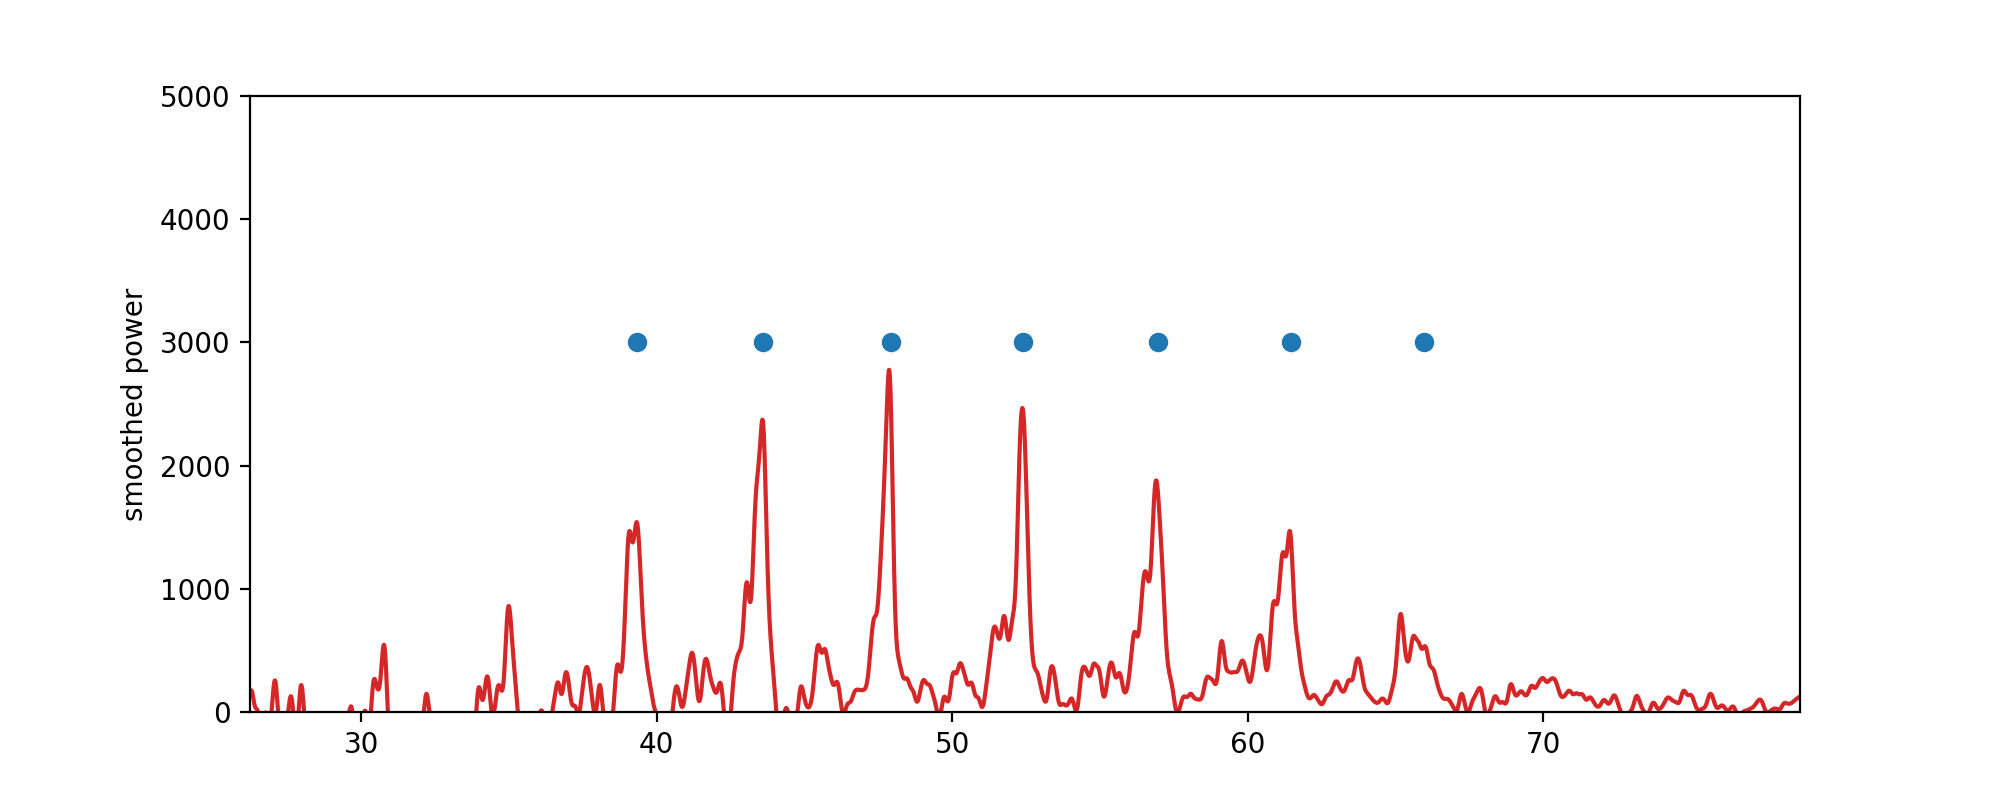

In [33]:
# radial = (7 + highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]*delta_nu)*delta_nu

# plt.figure(figsize=(10,4))
# plt.plot(powerspec['freq'],powerspec['power'])
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))
# plt.plot(powerspec['freq'],smooth_power,color='tab:red')

# peaks, _ = sp.signal.find_peaks(smooth_power,prominence=np.median(smooth_power)*250)#0.75)#prominence=10) 
# found_peaks = powerspec['freq'][peaks]
# plt.scatter(powerspec['freq'][peaks],smooth_power[peaks],marker='x',color='tab:green',s=30,zorder=3)

# plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),3000))

# # plt.axvline(radial,color='k')

# plt.xlim(nu_max*0.5,nu_max*1.5)
# subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
# peak = max(subset)
# plt.ylim(0,peak*1.1)
# plt.ylim(top=5000)
# plt.ylabel('smoothed power')
# plt.show()

In [34]:
# widths are 0.16Δν, 0.53Δν and 0.16Δν wide for l = 0–2, respectively
# using l=2 modes 0.12Δν to the left and l=1 modes 0.52Δν to the right

In [35]:
## all from Stello 2016 (nature)
# l0_halfwidth = 0.08
# l2_halfwidth = 0.08
# l1_halfwidth = 0.265
# d02_spacing = 0.12
# d01_spacing = 0.52

# accounting for asymmetries Stello 2016 (PASA)
l0_halfwidth = 0.08
l2_halfwidth = 0.08
l1_halfwidth = 0.265
l3_halfwidth = 0.075
d02_spacing = 0.14
d01_spacing = 0.515
d03_spacing = 0.175

<IPython.core.display.Javascript object>


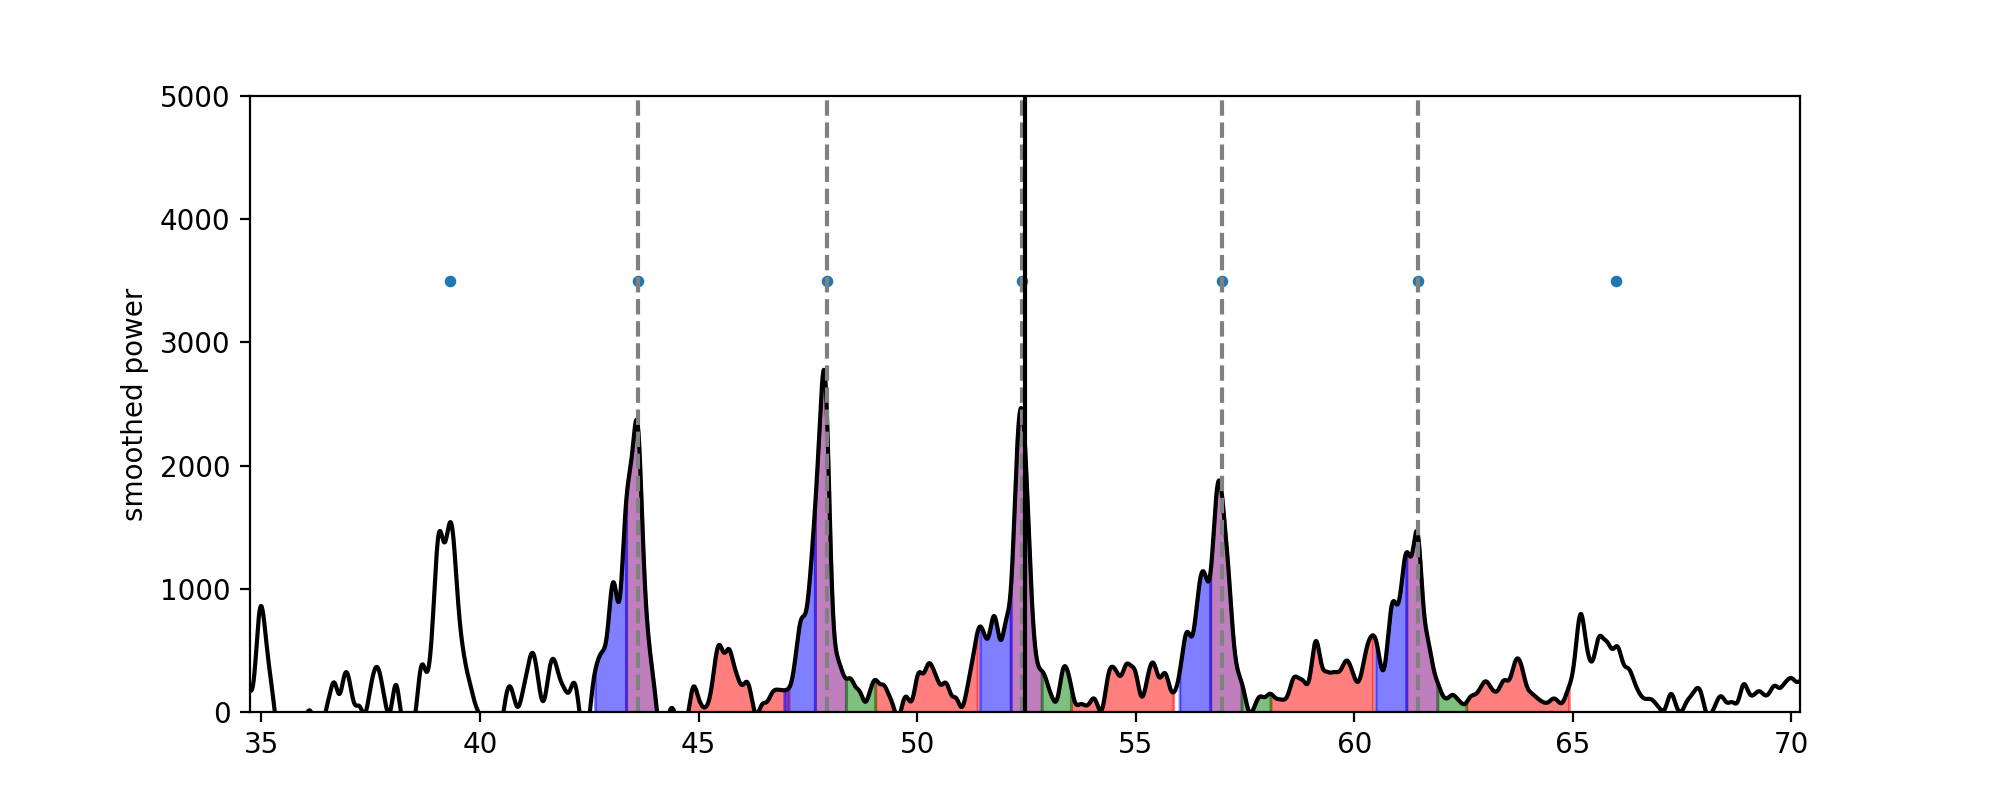

In [36]:
plt.figure(figsize=(10,4))
plt.plot(powerspec['freq'],smooth_power,color='k')

# plt.scatter(powerspec['freq'][peaks],smooth_power[peaks],marker='x',color='tab:green',s=30,zorder=3)

plt.scatter(star.f_labels[0],np.full(len(star.f_labels[0]),3500),s=10)
plt.scatter(star.f_labels[1],np.full(len(star.f_labels[1]),3500),s=10)
plt.scatter(star.f_labels[2],np.full(len(star.f_labels[2]),3500),s=10)

###################

def define_regions(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-(radial_mode+0.02*delta_nu))<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu
    

    plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][radial_region],smooth_power[radial_region], 0, color='purple',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][quadru_region],smooth_power[quadru_region], 0, color='blue',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][dipole_region],smooth_power[dipole_region], 0, color='red',alpha=0.5)
#     plt.axvline(radial_mode,color='grey',linestyle='--')
    plt.fill_between(powerspec['freq'][octupo_region],smooth_power[octupo_region], 0, color='green',alpha=0.5)
    
for i in [-2,-1,0,1,2]:
    define_regions(i)

###################

plt.axvline(nu_max,color='k')
plt.xlim(nu_max-4*delta_nu,nu_max+4*delta_nu)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.1)
plt.ylim(top=5000)
plt.ylabel('smoothed power')
plt.show()

$$A_{0}^{2}(n) = \delta \nu \int_{n-e_{20}}^{n+e_{03}}[p(n')-B]dn'$$
where p = power density, B = local background, $\delta \nu$ the frequency resolution   
where also $e_{12}$ = -0.22, $e_{20}$ = -0.065, $e_{03}$ = 0.17, $e_{31}$ = 0.27   
then   
$$\langle A_{\ell}^{2} \rangle = \sum_{n_{max}-2}^{n_{max}+2} A_{\ell}^{2}(n)/ \sum_{n_{max}-2}^{n_{max}+2} exp[\frac{-(\nu_{n,\ell}-\nu_{max})^2}{2\sigma^2}]$$
and
$$\delta\nu_{env} = 2\sqrt{2ln2}\sigma  \rightarrow  \sigma^2 = \frac{\delta\nu_{env}^2}{8ln2}$$
is the FWHM of the envelope

In [37]:
def find_mode_amps(index=0):
    # pick the radial mode closest to numax
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    radial_region = np.abs(powerspec['freq']-radial_mode)<l0_halfwidth*delta_nu
    # find the other modes based on this
    quadru_mode = radial_mode - d02_spacing*delta_nu
    quadru_region = np.abs(powerspec['freq']-quadru_mode)<l2_halfwidth*delta_nu
    dipole_mode = radial_mode + d01_spacing*delta_nu
    dipole_region = np.abs(powerspec['freq']-dipole_mode)<l1_halfwidth*delta_nu
    octupo_mode = radial_mode + d03_spacing*delta_nu
    octupo_region = np.abs(powerspec['freq']-octupo_mode)<l3_halfwidth*delta_nu

    # using unsmoothed power here, that seems more right
    # I don't think I need to have the frequency resolution here??
    # need the power density!
    eff_obs_time = len(lightcurve) * 1800e-6
    l0_amp = (sp.integrate.trapezoid(x=powerspec['freq'][radial_region],
                                     y=powerspec['power'][radial_region]*eff_obs_time))*freq_res
    l1_amp = (sp.integrate.trapezoid(x=powerspec['freq'][dipole_region],
                                     y=powerspec['power'][dipole_region]*eff_obs_time))*freq_res
    l2_amp = (sp.integrate.trapezoid(x=powerspec['freq'][quadru_region],
                                     y=powerspec['power'][quadru_region]*eff_obs_time))*freq_res
    l3_amp = (sp.integrate.trapezoid(x=powerspec['freq'][octupo_region],
                                     y=powerspec['power'][octupo_region]*eff_obs_time))*freq_res
    print(l0_amp,l1_amp,l2_amp,l3_amp)
    return l0_amp,l1_amp,l2_amp,l3_amp

l0_amp_arr = []
l1_amp_arr = []
l2_amp_arr = []
l3_amp_arr = []
for i in [-2,-1,0,1,2]:
    l0,l1,l2,l3 = find_mode_amps(i)
    l0_amp_arr.append(l0)
    l1_amp_arr.append(l1)
    l2_amp_arr.append(l2)
    l3_amp_arr.append(l3)

1054.0240847446512 435.20036134372015 506.66747566558246 -62.59672854069388
1005.7525807668435 447.071657736507 402.69143550124625 95.62412116847455
977.0941811824352 462.37427753248187 414.38842755906745 140.75376974267903
804.8784868595812 674.6092383190507 517.4111764240228 60.47701335721502
701.0236859138639 409.129280854657 486.2904519986622 66.99081850048717


In [38]:
FWHM = pysyd_results['FWHM'][pysyd_results['KIC']==kic_number].values[0]
# FWHM = 1
# print(FWHM)
sigma_var = FWHM/(2*np.sqrt(2*np.log(2)))

def mean_calculation(index=0):
    radial_mode_ind = np.argmin(np.abs(star.f_labels[0]-nu_max))
    radial_mode = star.f_labels[0][radial_mode_ind+index]
    l0_denom = np.exp(-(radial_mode-nu_max)**2/(2*sigma_var**2))
    quadru_mode = radial_mode - d02_spacing*delta_nu
    l2_denom = np.exp(-(quadru_mode-nu_max)**2/(2*sigma_var**2))
    dipole_mode = radial_mode + d01_spacing*delta_nu
    l1_denom = np.exp(-(dipole_mode-nu_max)**2/(2*sigma_var**2))
    octupo_mode = radial_mode + d03_spacing*delta_nu
    l3_denom = np.exp(-(octupo_mode-nu_max)**2/(2*sigma_var**2))
    return l0_denom,l1_denom,l2_denom,l3_denom

l0_denom_arr = []
l1_denom_arr = []
l2_denom_arr = []
l3_denom_arr = []
for i in [-2,-1,0,1,2]:
    l0_denom,l1_denom,l2_denom,l3_denom = mean_calculation(i)
    l0_denom_arr.append(l0_denom)
    l1_denom_arr.append(l1_denom)
    l2_denom_arr.append(l2_denom)
    l3_denom_arr.append(l3_denom)
# l0_denom_arr

mean_l0_amp = np.sum(l0_amp_arr)/np.sum(l0_denom_arr)
mean_l1_amp = np.sum(l1_amp_arr)/np.sum(l1_denom_arr)
mean_l2_amp = np.sum(l2_amp_arr)/np.sum(l2_denom_arr)
mean_l3_amp = np.sum(l3_amp_arr)/np.sum(l3_denom_arr)
print(mean_l0_amp,mean_l1_amp,mean_l2_amp,mean_l3_amp)

1354.4972627598436 738.064136642173 695.3682071307311 89.98117888915849


In [39]:
l1_visibility = mean_l1_amp/mean_l0_amp
l2_visibility = mean_l2_amp/mean_l0_amp
l3_visibility = mean_l3_amp/mean_l0_amp
print('Visibilites for KIC',kic_number)
print('dipole visiblity:',np.round(l1_visibility,2))
print('quadrupole visiblity:',np.round(l2_visibility,2))
print('octupole visiblity:',np.round(l3_visibility,2))
### THESE ARE CONSISTENT WITH EXPECTED VALUES ###

Visibilites for KIC 9612933
dipole visiblity: 0.54
quadrupole visiblity: 0.51
octupole visiblity: 0.07


In [68]:
star_ind = highmass_rc_newvals[highmass_rc_newvals['KIC']==kic_number].index[0]
# type(star_ind)
highmass_rc_newvals['l1_vis'][star_ind] = np.round(l1_visibility,2)
highmass_rc_newvals['l2_vis'][star_ind] = np.round(l2_visibility,2)
highmass_rc_newvals['l3_vis'][star_ind] = np.round(l3_visibility,2)

In [70]:
highmass_rc_newvals.to_csv('../datatables/highmass_rc_newvals.csv',index=False)
# highmass_rc_newvals

# Regular period echelle (with freq list)

In [350]:
def period_echelle(freq_list,numax,dnu,dPi=0):
#     nu_max   = hist.nu_max.values[0]
#     Delta_nu = hist.delta_nu.values[0]
#     Delta_P_default = hist.delta_Pg.values[0] # seconds
#     if Delta_P == 0:
#         Delta_P = Delta_P_default
#     Delta_P = 300
#     print(Delta_P)
    
#     freq = freq[freq['Re(freq)'] < 5/3*numax]
#     dipole = freq[np.logical_and(freq.l == 1, freq.n_p > 2)]
#     period = 1/(dipole['Re(freq)']*1e-6)
    period_list = 1/(np.asarray(freq_list)*1e-6)
#     print(period)
    
#     plt.scatter(dipole['Re(freq)'] % Delta_P, dipole['Re(freq)'], 
#                 marker='.', facecolor='k', edgecolor='k',linewidth=0.5)
    plt.figure(figsize=(6,10))
    plt.scatter(period_list % dPi, freq_list, 
                marker='.', facecolor='k', edgecolor='k',linewidth=0.5)
    plt.plot(period_list % dPi, freq_list, linewidth=0.5)
    
#     colors = ('black', 'red', 'blue', 'purple')
#     for ell in np.unique(freq.l.values):
#         nus = freq[freq.l == ell]
#         plt.scatter(nus['Re(freq)'] % Dnu,
#                  nus['Re(freq)'], marker='.', 
#                 facecolor=colors[ell], edgecolor='k',linewidth=0.5,
#                     alpha=1, s=nus['E_p']*150, 
#                  label=str(ell))
#         plt.plot(nus['Re(freq)'] % Dnu,
#                  nus['Re(freq)'], '.', 
#                  mfc=colors[ell], mec='white', alpha=0.85,
#                  mew=1, markersize=nus['E_p'], 
#                  label=str(ell))
    
#     plt.legend(loc='lower right')
    
    plt.axvline(dPi, ls='--', c='darkgray', zorder=-99)
    plt.axhline(numax, ls='--', c='darkgray', zorder=-99)
    
#     plt.ylim([0, nu_max*5/3*1.2])
    plt.xlim([0, dPi])
    
    plt.ylabel(r'frequency $\nu/\mu\rm{Hz}$')
    plt.xlabel(r'P $\rm{mod}\; \Delta P/s$ '+str(dPi))
    plt.title('Period Echelle Diagram', size=24)
    plt.show()

<IPython.core.display.Javascript object>


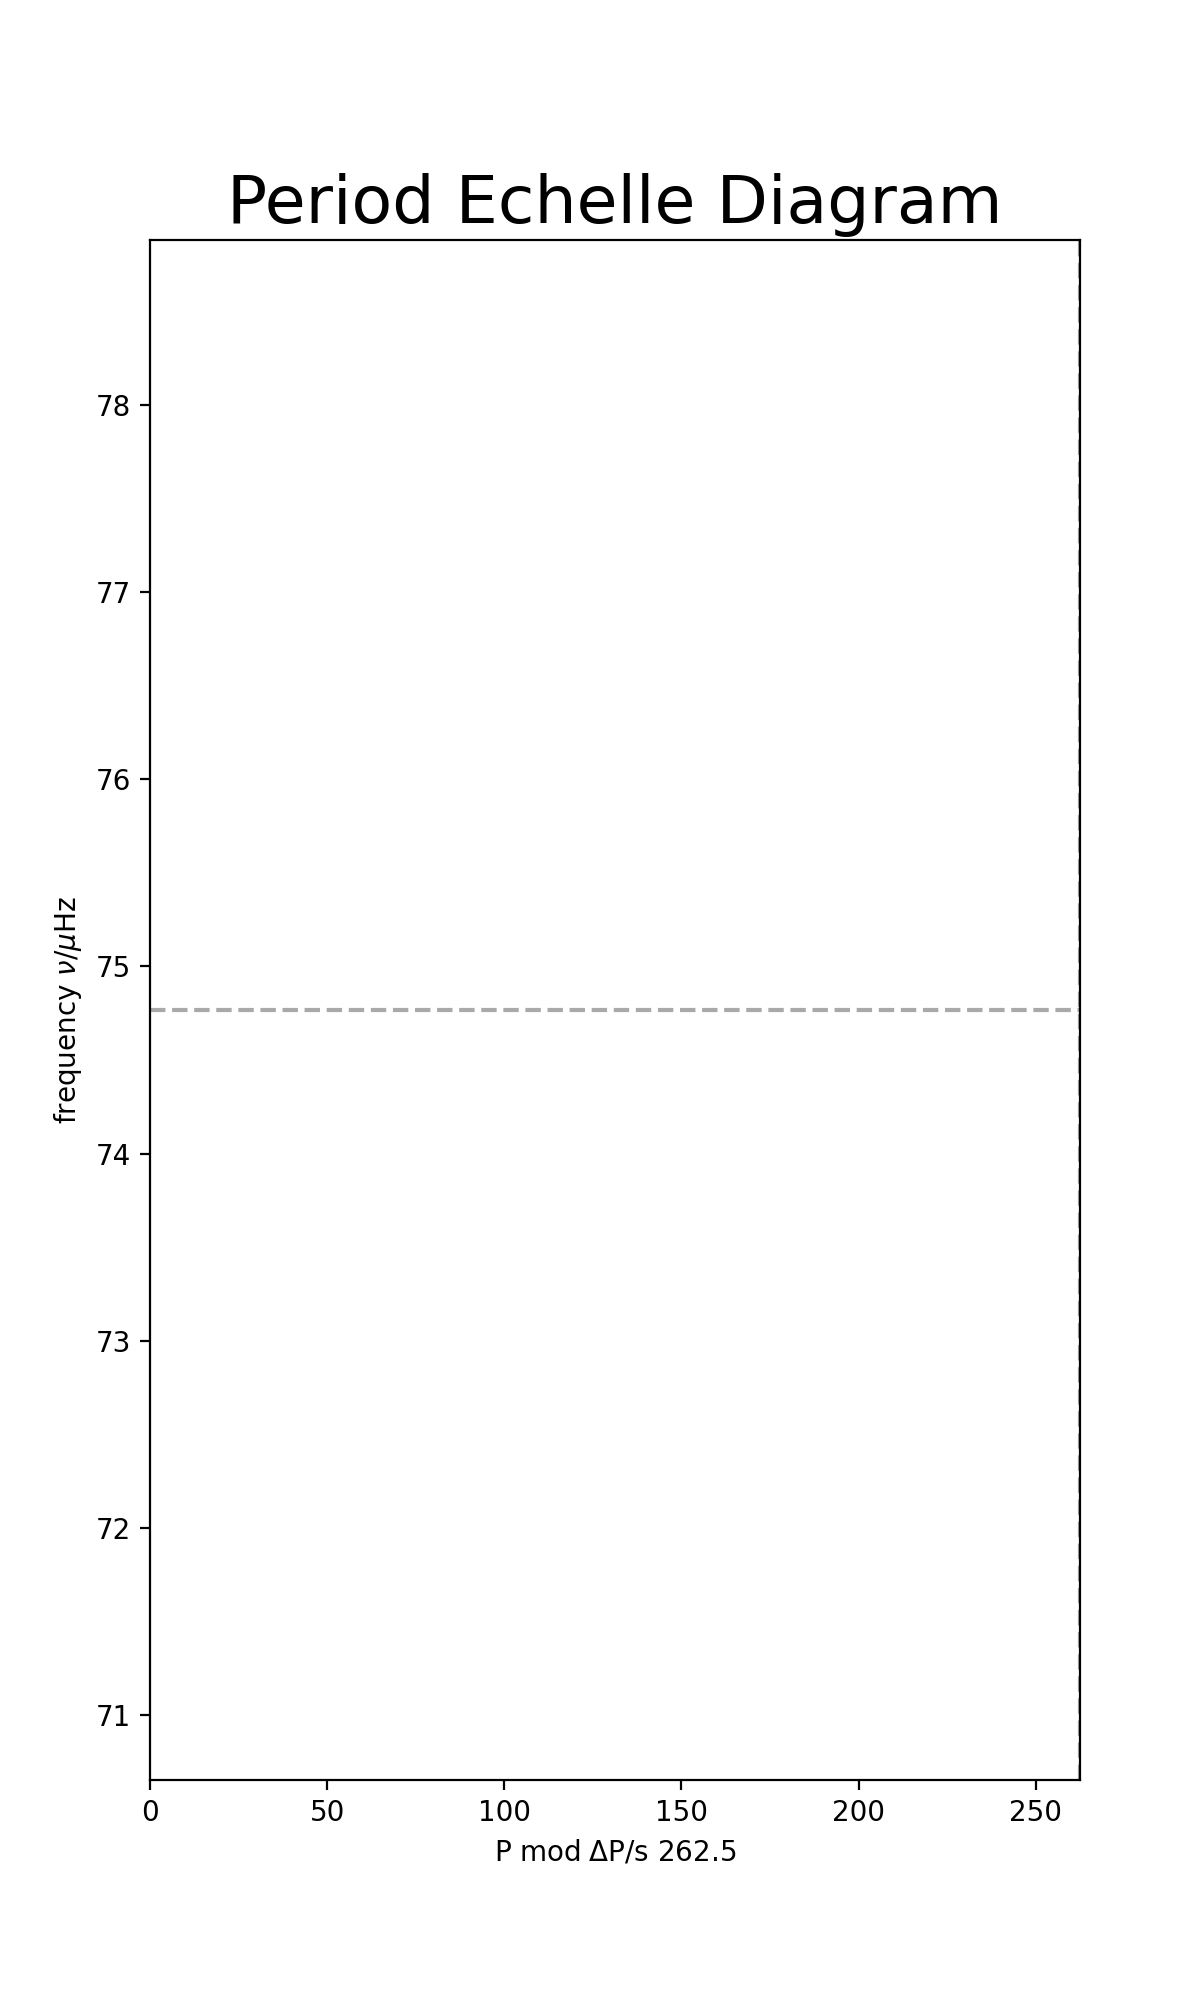

In [14]:
period_echelle(star.f_labels[1],star.numax,star.Dnu,dPi=262.5)